In [10]:
from pca_functions import *

In [11]:
df_90 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_90s_1s_ketone.csv')
#df_45= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_30s_30s_ketone.csv')


df_all = pd.concat([df_90, df_30], ignore_index=True)

In [12]:
df_30_dark_maze=df_30[df_30['trial'] == 15]
df_30_pca = df_30_dark_maze.drop(columns=['participant_id', 'center_dist', 'edge_dist','drink', 'session','trial', 'version', 'segment', 'stops_count','unsafe_area_coverage', 'safe_area_coverage', 'safe_time_spent', 'unsafe_time_spent','outside_time_spent'])
scaler=StandardScaler()
df_30_pca_scaled=scaler.fit_transform(df_30_pca)
find_num_components_explaining_90variance(df_30_pca_scaled)

No. of components explaining 80 % of the variance in data: 2
No. of components explaining 85 % of the variance in data: 2
No. of components explaining 90 % of the variance in data: 3
No. of components explaining 95 % of the variance in data: 4
No. of components explaining 99 % of the variance in data: 5


In [13]:
df_30_pca_df = pd.DataFrame(df_30_pca_scaled, columns=df_30_pca.columns)
reduced_3_data_30=reduce_data(df_30_pca_df, 3)

Proportion of variance explained by each of the 3 components is: [0.50619767 0.25013313 0.11013256]
Total explained variance by 3 components is: 86.64633638892425


In [14]:
reduced_3_data_30_df = pd.DataFrame(reduced_3_data_30, columns=[f'PC{i+1}' for i in range(reduced_3_data_30.shape[1])])
reduced_3_data_30_df

,PC1,PC2,PC3
0,-2.538745,-0.584267,0.661764
1,0.170843,-0.683093,0.830947
2,-1.043087,-0.508158,0.710375
3,-0.956029,0.562065,0.296760
4,1.258915,0.188365,0.232192
...,...,...,...
109,0.244671,0.045714,-0.648533
110,0.716057,-1.346881,-0.133931
111,0.136680,-0.417336,-0.687885
112,1.859159,-0.762307,-0.812451


In [15]:
combined_30_dark_maze = pd.concat([
    df_30_dark_maze[['participant_id', 'session', 'drink', 'segment']].reset_index(drop=True),
    reduced_3_data_30_df[['PC1', 'PC2', 'PC3']].reset_index(drop=True)
], axis=1)


In [16]:
#combined_30_dark_maze.to_csv('../data/pca/combined_30_dark_maze_pca.csv', index=False)

In [17]:
component_weight_30_dark_maze = components_weight(df_30_pca_df, 3)

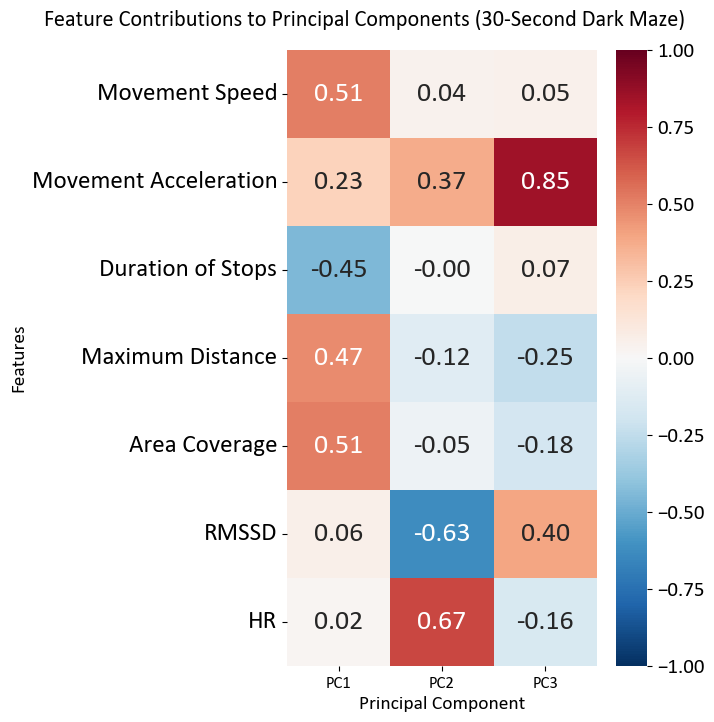

In [20]:
component_weight_30_dark_maze = component_weight_30_dark_maze.rename(
    columns={
        'speed': 'Movement Speed',
        'acceleration': 'Movement Acceleration',
        'stops_duration': 'Duration of Stops',
        'max_distance': 'Maximum Distance',
        'area_covered': 'Area Coverage',
        'rmssd': 'RMSSD',
        'hr': 'HR'
    }
)

# Add title now!

fig, ax=display_pc_weights_1(component_weight_30_dark_maze, is_horizontal=False, save_fig=False)

plt.suptitle("Feature Contributions to Principal Components (30-Second Dark Maze)", fontsize=16, x=0.28, y=0.93)


plt.show()